1.Import relevant commands for numpy, pandas, sklearn.

In [19]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv, to_numeric
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz


from lightgbm import LGBMClassifier
import warnings




import math

Q1: Create the following training datasets from the optdigits.tra set: 
X25: Randomly chosen N=25 instances from each class. 
X100:  Randomly chosen N=100 instances from each class


In [20]:
#Read Training Data
train_data = read_csv(r'C:\Users\gangareddy\Documents\GitHub\MLprojects\Assignment3\optdigits.tra', sep=",",header=None)
test_data= read_csv(r'C:\Users\gangareddy\Documents\GitHub\MLprojects\Assignment3\optdigits.tes', sep=",",header=None)
#print(train_data.head())
train_data
test_data


classes = 10
X25_train = train_data[train_data[64] == 0].sample(25)
X100_train = train_data[train_data[64] == 0].sample(100)
#print(X25_train)
# print(X100_train)
for i in range(1,classes,1):

    X25_train = X25_train.append(train_data[train_data[64] == i].sample(25), ignore_index = True)
    X100_train = X100_train.append(train_data[train_data[64] == i].sample(100), ignore_index= True)

    
# get the X_train and Y_train

X_train_25 = X25_train.iloc[:,0:64]
Y_train_25 = X25_train.iloc[:,64];  #classification or label column

X_train_100 = X100_train.iloc[:,0:64]
Y_train_100 = X100_train.iloc[:,64];

# X_test = test_data.iloc[:,0:64]
# Y_test = test_data.iloc[:,64]
X_test = test_data[test_data.columns[0:64]]
Y_test = test_data[test_data.columns[64]]

print(X_test.shape)
print(Y_test.shape)
print(type(X_test))
print(type(Y_test))







(1797, 64)
(1797,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Q2: Decision Trees, classification: 
Use library sklearn.tree.DecisionTreeClassifier
 algorithm. For the DecisionTreeClassifier determine the value of the tree depth parameter (experiment with depth=2, 3, 5, 10)  that results in the best test error. Report the training and test errors for each depth value and the training set. How does the best depth value change as the number of instances change? 
Note: Check the depth of the your trained decision tree, by e.g. plotting the tree.


In [21]:

TrainingError_25 = []
TestingError_25=[]

TrainingError_100 = []
TestingError_100=[]
index=[]

#storing the max_depth parameters in a list
mdepth=[2,3,5,10]
#train with 25 instances from each class


for i in mdepth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train_25,Y_train_25)
        a1=model.score(X_train_25,Y_train_25)
        a2=model.score(X_test,Y_test)
        TrainingError_25.append(1-a1)
        TestingError_25.append(1-a2)

#train with 100 instances from each class

for i in mdepth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train_100,Y_train_100)
        y_pred = model.predict(X_train_100)
        y_pred1= model.predict(X_test)
        x1=accuracy_score(Y_train_100,y_pred)
        x2=accuracy_score(Y_test,y_pred1)
        TrainingError_100.append(1-x1)
        TestingError_100.append(1-x2)
        temp = 'Max_Depth = '+str(i)
        index.append(temp)

columns = ['Training Error','Test Error']

Error_list_25=[]
Error_list_100=[]
for i in range(len(TrainingError_25)):
    Error_list_25.append([TrainingError_25[i],TestingError_25[i]])
    Error_list_100.append([TrainingError_100[i],TestingError_100[i]] )
    
print("Results with 25 instances")   
df_train_error_25 = pd.DataFrame(Error_list_25,columns=columns,index=index)
print(df_train_error_25.head(20)) 

print()
print("Results with 100 instances")   
df_train_error_100 = pd.DataFrame(Error_list_100,columns=columns,index=index)
print(df_train_error_100.head(20))



Results with 25 instances
                Training Error  Test Error
Max_Depth = 2            0.708    0.744574
Max_Depth = 3            0.544    0.636060
Max_Depth = 5            0.176    0.372287
Max_Depth = 10           0.000    0.329994

Results with 100 instances
                Training Error  Test Error
Max_Depth = 2            0.717    0.737340
Max_Depth = 3            0.539    0.579299
Max_Depth = 5            0.215    0.307735
Max_Depth = 10           0.008    0.204229


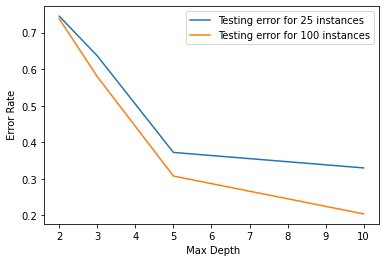

"\nfeature_names = X_train_25.columns\n\ndotfile = export_graphviz(model,feature_names=feature_names)\ngraph = graphviz.Source(dotfile)\ngraph.render(filename='tree',format='jpg',cleanup=True)\n\n"

In [22]:
plt.plot(mdepth,TestingError_25,label='Testing error for 25 instances')
plt.plot(mdepth,TestingError_100,label='Testing error for 100 instances')
plt.legend()
plt.xlabel(' Max Depth')
plt.ylabel(' Error Rate')

plt.show()

"""
feature_names = X_train_25.columns

dotfile = export_graphviz(model,feature_names=feature_names)
graph = graphviz.Source(dotfile)
graph.render(filename='tree',format='jpg',cleanup=True)

"""


Q2:Repeat Q1 using XGBoost and LightGBM algorithms. Experiment with at least 5 different parameter settings to see their effect on training and test errors. How do best parameters change as the #training instances change? 

In [23]:
#XGBOOST
print("************ XGBOOST ALGORITHM *************")

print()
print("For 25 random instances")
print()
learning_rate= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
max_depth= [3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight =[1, 3, 4, 5,7]
 #The value should be less than 1
gamma = [0.0, 0.1, 0.2 , 0.3, 0.4 ]
 #The value should be less than 1
colsample_bytree = [0.3,0.4,0.5,0.6,0.7]

warnings.filterwarnings("ignore")


    
for i in range(1,6,1):
    xgb = XGBClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],min_child_weight=min_child_weight[i-1],gamma=gamma[i-1],colsample_bytree=colsample_bytree[i-1])
    xgb.fit(X_train_25,Y_train_25)
    print("The training error of 25 random instances using SET"+str(i)+"parameters ",1-xgb.score(X_train_25,Y_train_25))
    print("The testing error of 25 random instances using SET"+str(i)+" parameters ",1-xgb.score(X_test,Y_test))
print()
print("For 100 random instances")
print()   
for i in range(1,6,1):
    xgb = XGBClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],min_child_weight=min_child_weight[i-1],colsample_bytree=colsample_bytree[i-1])
    xgb.fit(X_train_100,Y_train_100)
    print("The training error of 100 random instances using SET"+str(i)+"parameters ",1-xgb.score(X_train_100,Y_train_100))
    print("The testing error of 100 random instances using SET"+str(i)+" parameters ",1-xgb.score(X_test,Y_test))    

************ XGBOOST ALGORITHM *************

For 25 random instances

[12:39:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The training error of 25 random instances using SET1parameters  0.0
The testing error of 25 random instances using SET1 parameters  0.1029493600445186
[12:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The training error of 25 random instances using SET2parameters  0.0
The testing error of 25 random instances using SET2 parameters  0.11908736783528107
[12:

In [24]:
#LIGHTBGM
print("************ LIGHTBGM ALGORITHM *************")
print()
print("For 25 random instances")
print()
learning_rate= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
max_depth= [3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight =[1, 3, 4, 5,7]
 #The value should be less than 1
reg_alpha = [0.0, 0.1, 0.2 , 0.3, 0.4 ]
 #The value should be less than 1
colsample_bytree = [0.3,0.4,0.5,0.6,0.7]

for i in range(1,6,1):
    lgb = LGBMClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],min_child_weight=min_child_weight[i-1],reg_alpha=reg_alpha[i-1],colsample_bytree=colsample_bytree[i-1])
    lgb.fit(X_train_25,Y_train_25)
    print("The training error of 25 random instances using SET"+str(i)+"parameters ",1-lgb.score(X_train_25,Y_train_25))
    print("The testing error of 25 random instances using SET"+str(i)+" parameters ",1-lgb.score(X_test,Y_test))
print("******************************")    
print()
print("For 100 random instances")
print()
for i in range(1,6,1):
    lgb = LGBMClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],min_child_weight=min_child_weight[i-1],reg_alpha=reg_alpha[i-1],colsample_bytree=colsample_bytree[i-1])
    lgb.fit(X_train_100,Y_train_100)
    print("The training error of 100 random instances using SET"+str(i)+"parameters ",1-lgb.score(X_train_100,Y_train_100))
    print("The testing error of 100 random instances using SET"+str(i)+" parameters ",1-lgb.score(X_test,Y_test)) 



************ LIGHTBGM ALGORITHM *************

For 25 random instances

The training error of 25 random instances using SET1parameters  0.0
The testing error of 25 random instances using SET1 parameters  0.11018363939899833
The training error of 25 random instances using SET2parameters  0.0040000000000000036
The testing error of 25 random instances using SET2 parameters  0.12910406232609906
The training error of 25 random instances using SET3parameters  0.01200000000000001
The testing error of 25 random instances using SET3 parameters  0.1502504173622704
The training error of 25 random instances using SET4parameters  0.02400000000000002
The testing error of 25 random instances using SET4 parameters  0.16082359488035614
The training error of 25 random instances using SET5parameters  0.052000000000000046
The testing error of 25 random instances using SET5 parameters  0.1836393989983306
******************************

For 100 random instances

The training error of 100 random instances us